# Major Project 
#Objective: For Marketing purposes in the retail industry one company wants refined customer data , we need to use any unsupervised ML algorithm and build at least  3 or 4  groups, so that company can target particular customers.

# Step1 : Importing Required Libraries

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#load the data into a DataFrame by reading the dataset.csv file
dataframe=pd.read_csv("dataset.csv")

In [3]:
#now print the data to check how it looks
print(dataframe)
dataframe.head()

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Step2 : Data Cleaning

In [4]:
#check if any NULL values are present in given data
print(dataframe.isnull().sum()) 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [5]:
#handling NULL values
imputer=SimpleImputer(missing_values=np.nan, strategy="mean") # filling the NAN values with mean of the elements of the column
imputer.fit(dataframe.iloc[:,1:]) # fitting the size of the imputer 
dataframe.iloc[:,1:]=imputer.transform(dataframe.iloc[:,1:]) # transforming the NAN values and updating the dataframe

In [6]:
#now print the data 
print(dataframe)
dataframe.head()

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [7]:
#check if any duplicate rows are present in the dataframe
duplicates=dataframe[dataframe.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


In [8]:
# As we can see that no duplicates are present
# Drop "Customer ID" column since we don't use it here
dataframe.drop("CUST_ID", axis = 1, inplace = True)

In [9]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


# Step3 : Data Visualization and Exploration

In [10]:
# Reading all columns in the dataset
dataframe.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

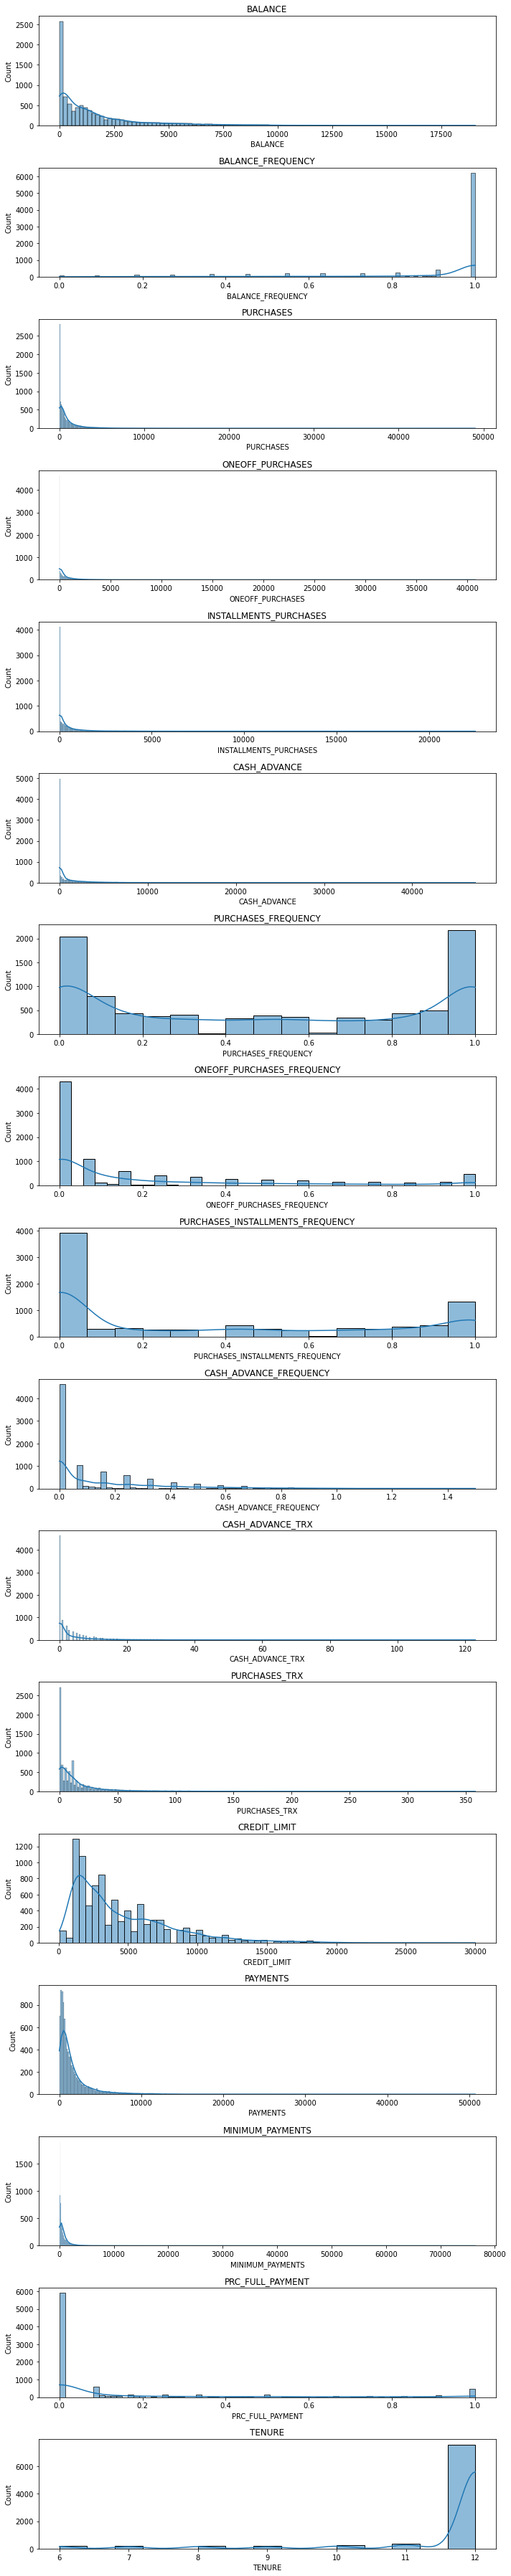

In [11]:
# Now Ploting histograms to show distributions of each column
plt.figure(figsize=(10,50))
for i in range(len(dataframe.columns)):
  plt.subplot(17, 1, i+1)
  sns.histplot(data=dataframe[dataframe.columns[i]], kde=True)
  plt.title(dataframe.columns[i])

plt.tight_layout()

<AxesSubplot:>

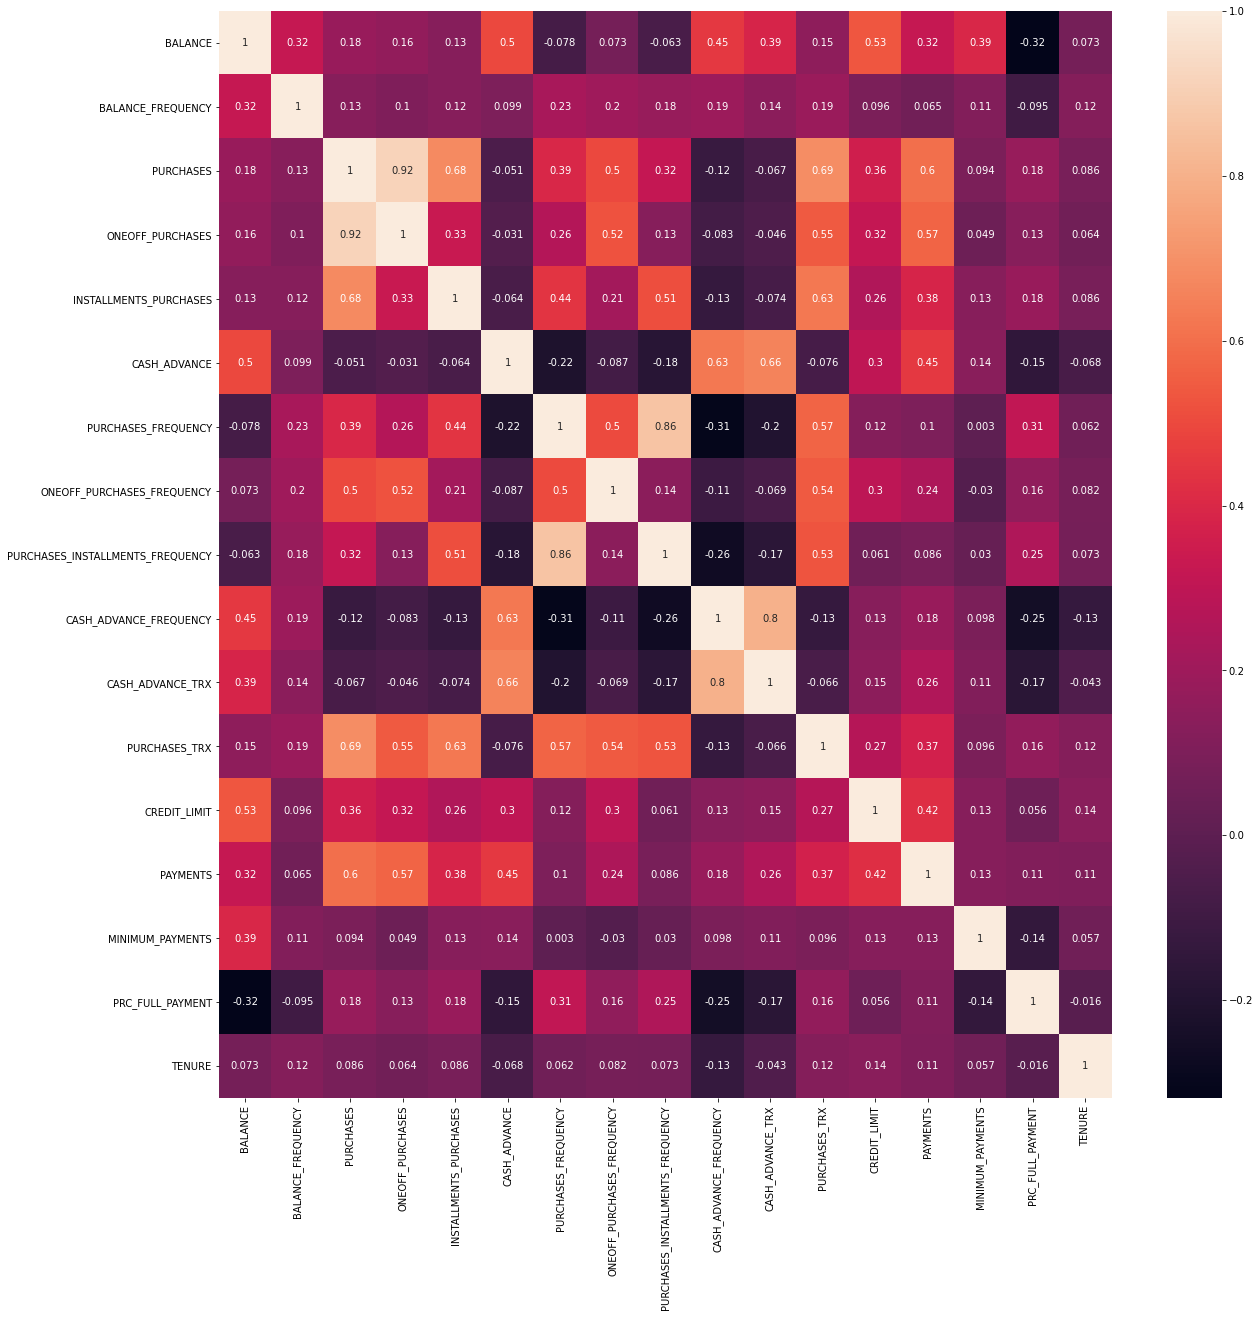

In [12]:
# checking the correlation between every two columns
correlations = dataframe.corr()
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations , annot =True)

from above heatmap it is observed that 3 pairs are correlated strongly
1."PURCHASES" and "ONEOFF_PURCHASES" -- 0.92
2."PURCHASES_FREQUENCY" and 'PURCHASES_INSTALLMENT_FREQUENCY' --0.86
3."CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --0.8

# Step 4: Use K-means to group observations with similar attribute values

In [13]:
#as the given dataframe is not containing any duplicates go for feature scaling
#Feature scaling ,scaling the above numeric data columns using Standardization and Normalization
#Standardization

stdscale=StandardScaler() # taking the instance of StandardScaler
datascaled=stdscale.fit_transform(dataframe) #fitting the transformed standard data

In [14]:
#print the Standardized Data
print('Standardized Data')
print('\n')
print(datascaled)

Standardized Data


[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


Text(0.5, 1.0, 'Elbow Method')

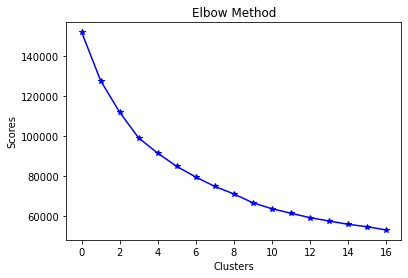

In [15]:
# selecting the optimal number of clusters using elbow method
clusterscores=[]
for i in range(1,18):
    kmeanmodel=KMeans(n_clusters=i)
    kmeanmodel.fit(datascaled)
    clusterscores.append(kmeanmodel.inertia_)
plt.plot(clusterscores,'b*-')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.title('Elbow Method')

 From this plot, 4th cluster seems to be the elbow of the curve.
 However, the values does not reduce to linearly until 8th cluster, so we may consider using 8 clusters in this case.

In [16]:
# Apply kmeans algorithm
kmeans=KMeans(8)
kmeans.fit(datascaled)
labels=kmeans.labels_

In [17]:
kmeans.cluster_centers_.shape

(8, 17)

In [18]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dataframe.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
1,-0.161258,0.391841,0.453685,0.593268,-0.017360,-0.332048,0.941220,1.874193,0.089564,-0.406121,-0.322194,0.524385,0.377442,0.087496,-0.161830,0.403800,0.260639
2,-0.365304,0.333189,-0.036222,-0.244327,0.363038,-0.364848,0.997189,-0.387824,1.213089,-0.475819,-0.361682,0.190151,-0.261821,-0.216677,-0.031399,0.319714,0.256865
3,0.015124,0.403899,-0.361228,-0.247174,-0.399906,-0.091161,-0.862127,-0.409690,-0.753639,0.108164,-0.025715,-0.485575,-0.306608,-0.249571,-0.010398,-0.456933,0.273268
4,1.693002,0.396284,-0.218088,-0.156781,-0.227703,2.014422,-0.477650,-0.213849,-0.413600,1.919074,1.934345,-0.267350,1.030202,0.807791,0.556007,-0.395309,0.070564
5,0.893669,0.466865,2.275145,1.760088,2.146018,-0.194869,1.160334,1.585940,1.227799,-0.311321,-0.211472,2.788206,1.230807,1.292136,0.440461,0.306745,0.334119
6,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
7,-0.700956,-2.143508,-0.311205,-0.235887,-0.302358,-0.319880,-0.556658,-0.445148,-0.439473,-0.520753,-0.376148,-0.419741,-0.174766,-0.192120,-0.256461,0.283077,0.199473


In [19]:
# for seeing how the original data looks we perform inveerse transformation
cluster_centers = stdscale.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [dataframe.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
1,1228.829033,0.970094,1972.510118,1577.141330,395.368789,282.550045,0.868108,0.761566,0.400032,0.053875,1.050091,27.744080,5867.738864,1986.435913,487.069414,0.271819,11.866120
2,804.125571,0.956200,925.815397,186.903808,739.358006,213.768492,0.890571,0.086762,0.846550,0.039928,0.780610,19.436282,3541.839181,1105.885986,791.032739,0.247226,11.861069
3,1595.953309,0.972951,231.435508,182.179597,49.437385,787.701269,0.144337,0.080239,0.064922,0.156789,3.073341,2.640264,3378.884000,1010.659591,839.975033,0.020070,11.883022
4,5088.315080,0.971147,537.255668,332.213802,205.158998,5203.208976,0.298646,0.138662,0.200062,0.519171,16.449309,8.064516,8242.747172,4071.619819,2159.958355,0.038094,11.611751
5,3424.571420,0.987867,5864.086848,3513.823602,2351.685047,570.222122,0.956049,0.675574,0.852396,0.072846,1.805687,84.014218,8972.630332,5473.750523,1890.681393,0.243432,11.964455
6,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
7,105.494632,0.369494,338.310626,200.913113,137.648613,308.067290,0.266937,0.069661,0.189780,0.030936,0.681895,4.276650,3858.578210,1176.975090,266.534101,0.236510,11.784264


In [20]:
# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


In [21]:
# Predict which cluster each customer belong to
y_kmeans = kmeans.fit_predict(datascaled)
y_kmeans

array([0, 2, 4, ..., 6, 6, 6])

In [22]:
# Concatenate the clusters labels to original dataframe
dataframe_cluster = pd.concat([dataframe, pd.DataFrame({'CLUSTER':labels})], axis = 1)
dataframe_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,3


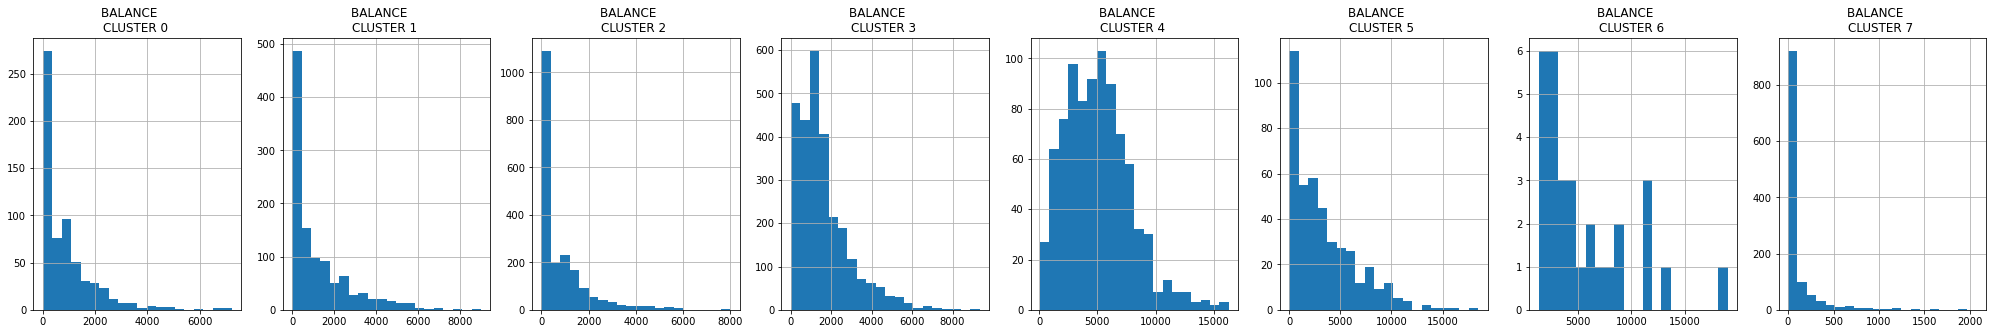

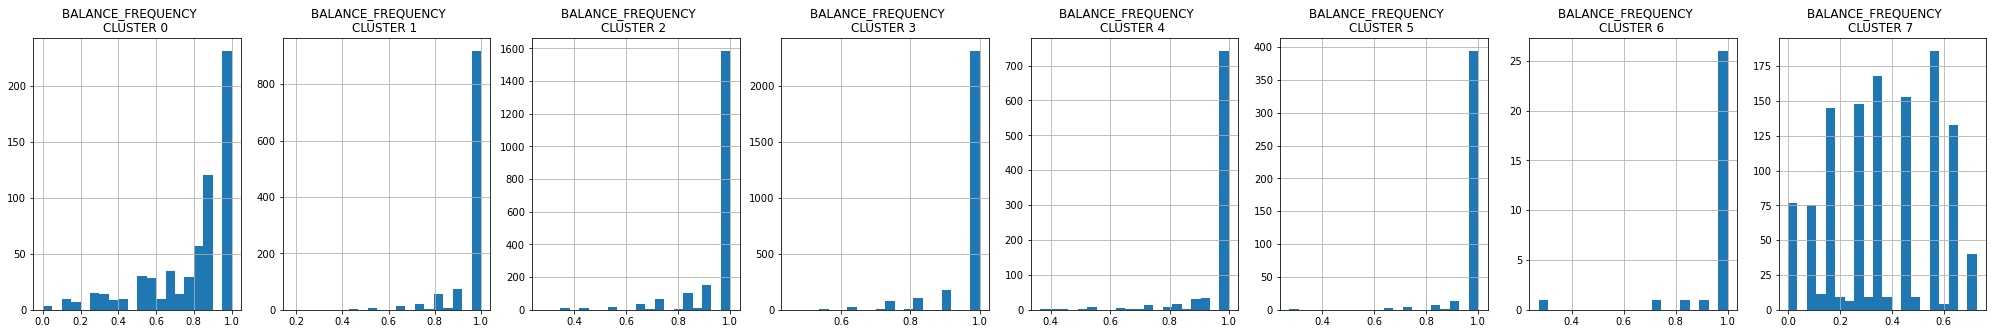

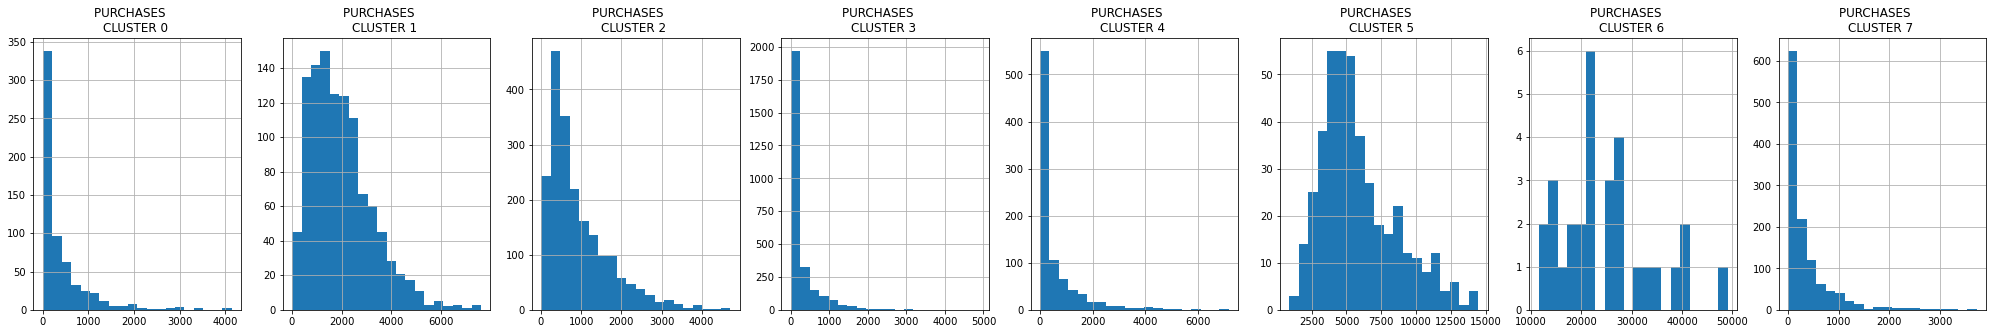

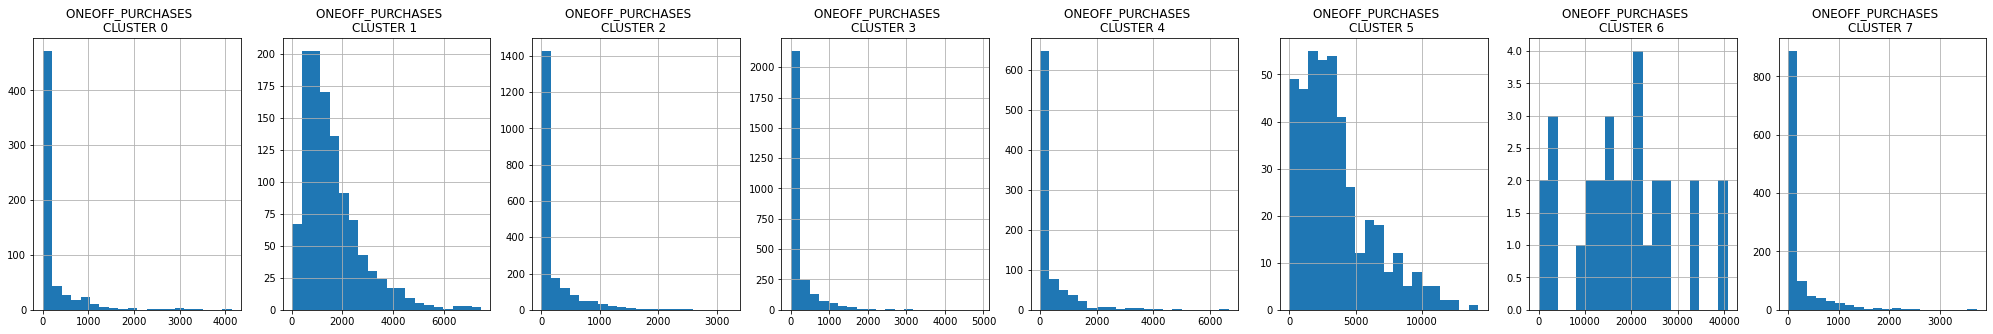

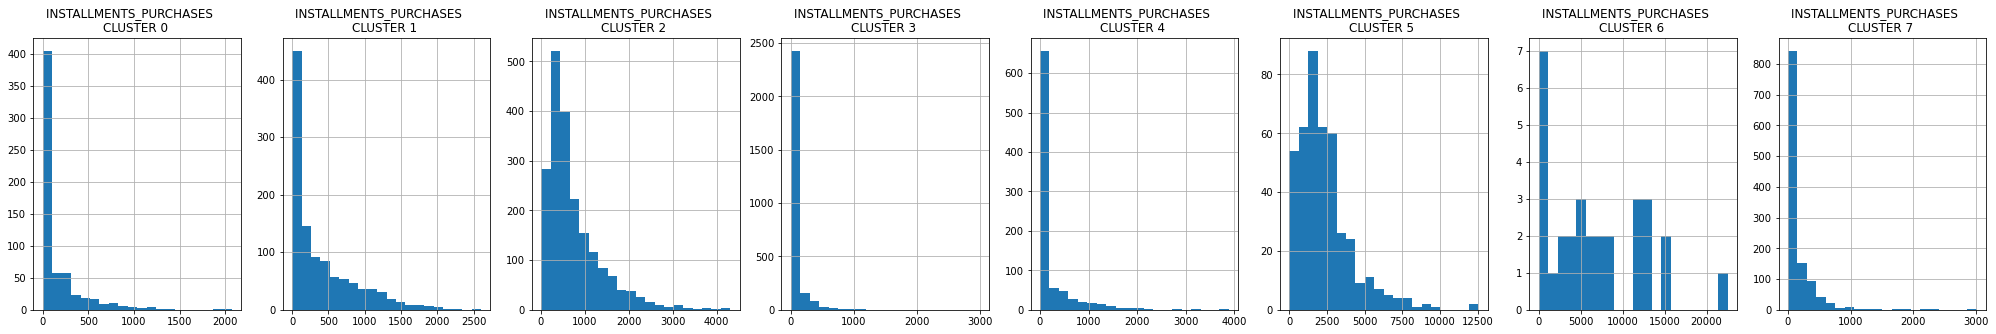

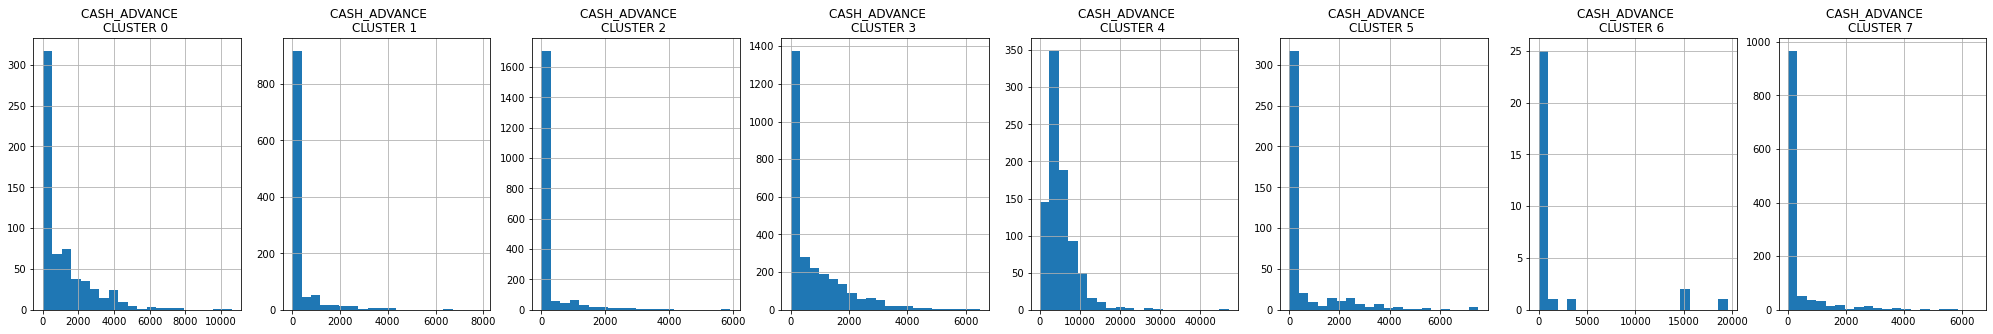

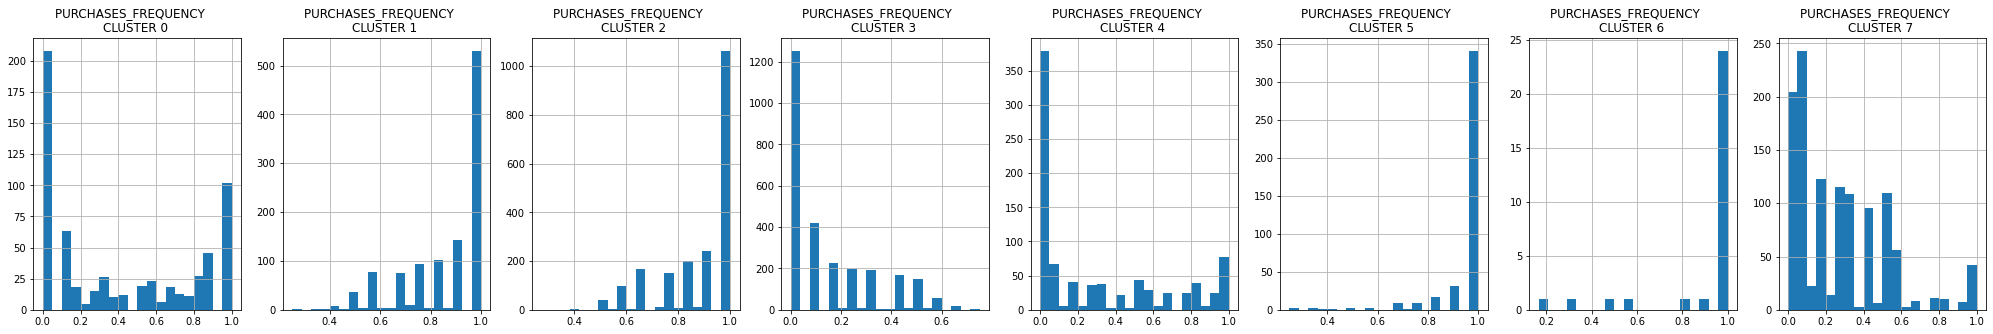

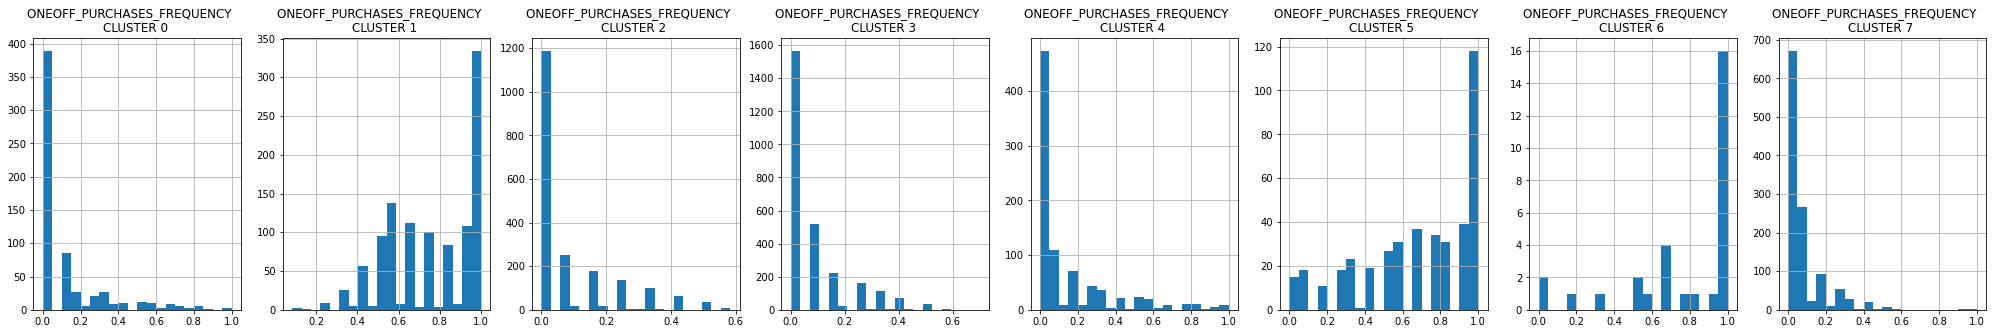

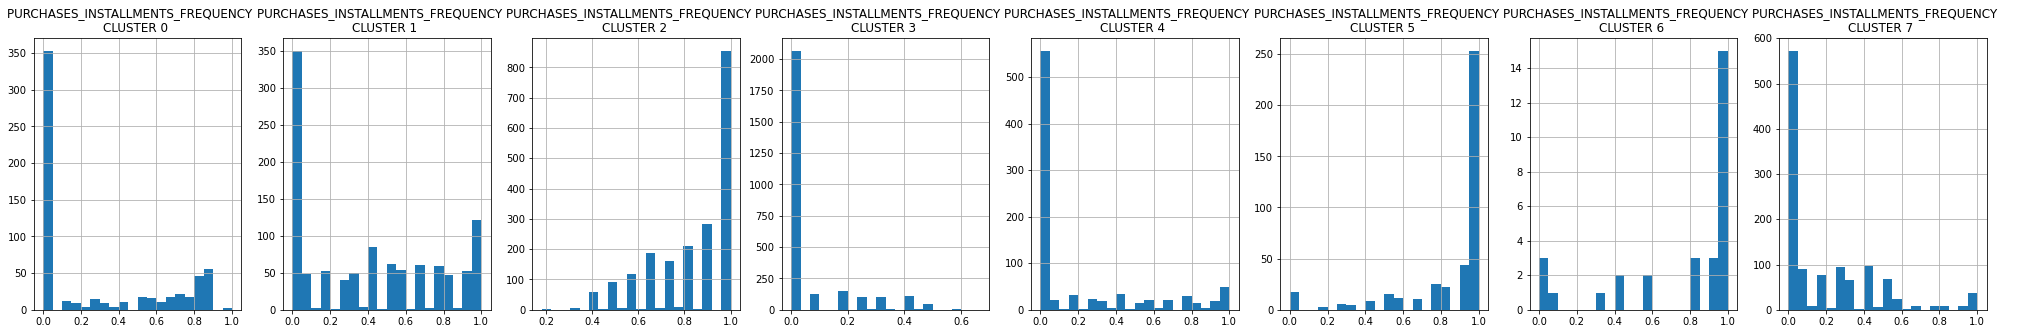

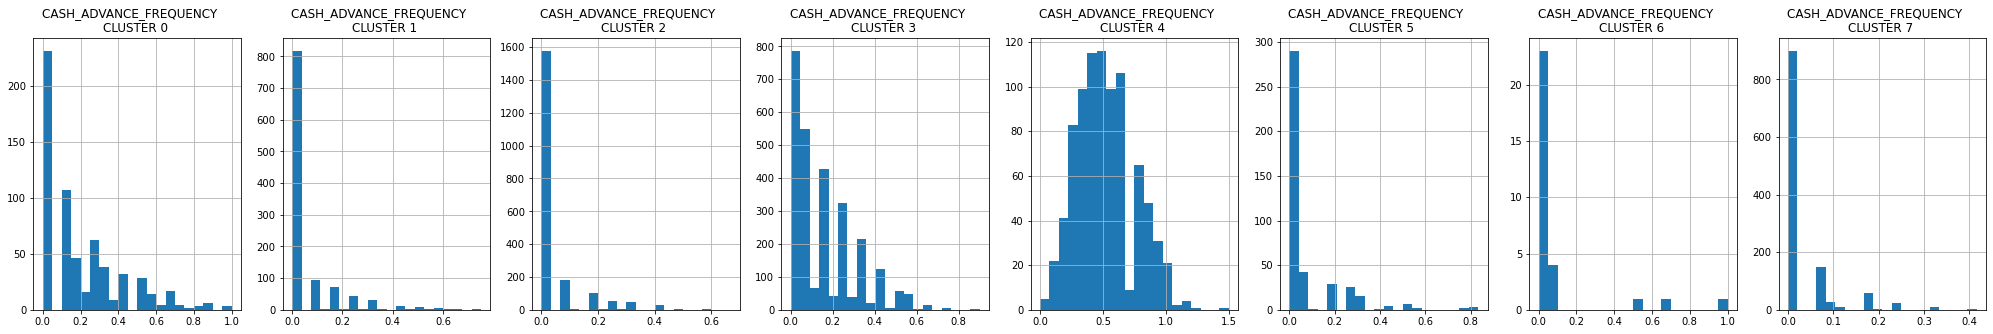

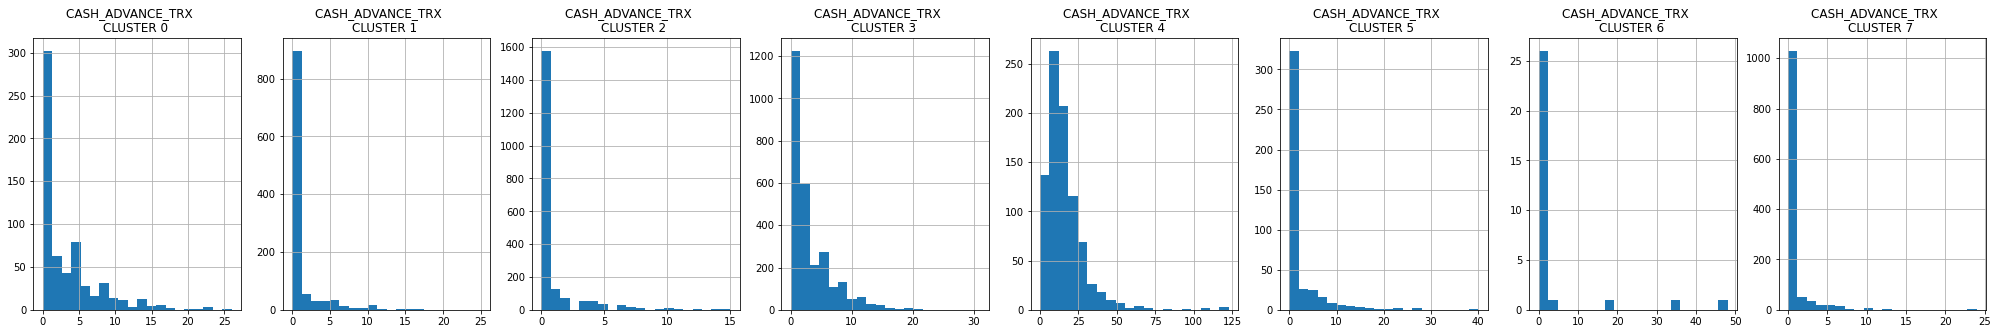

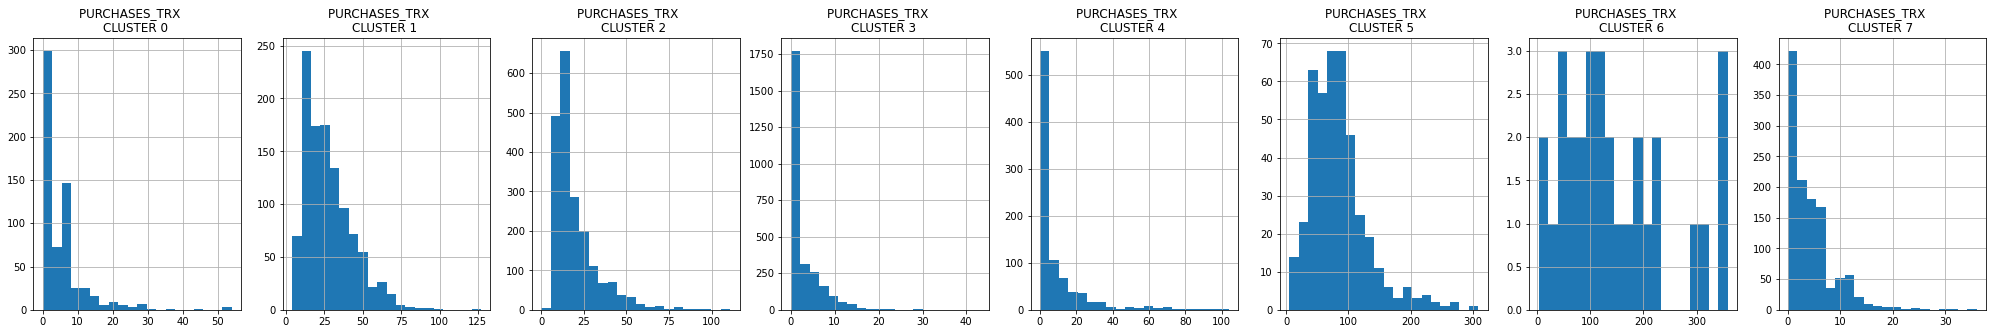

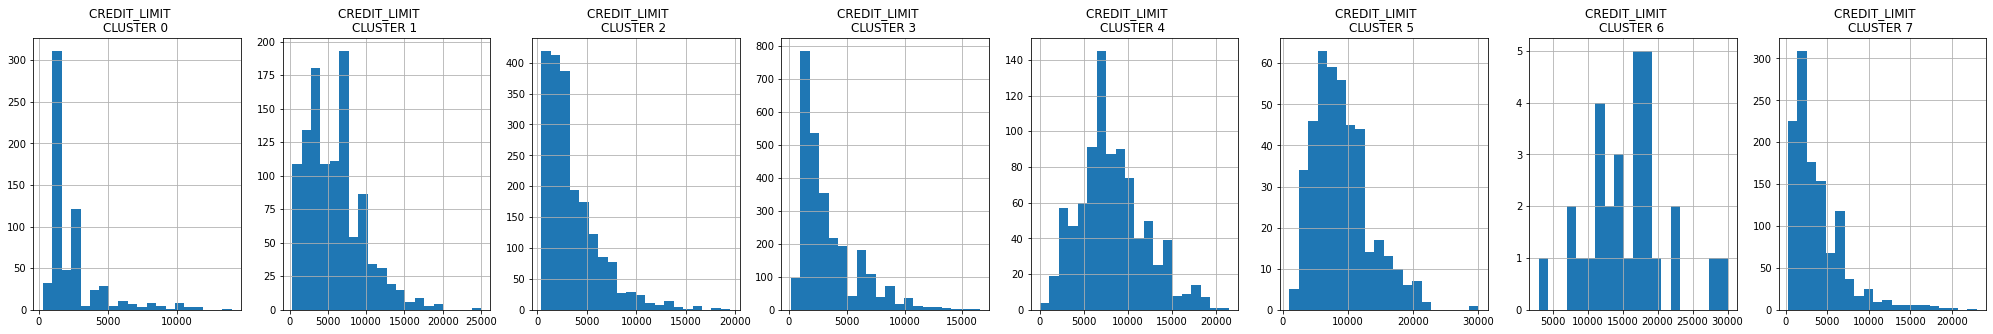

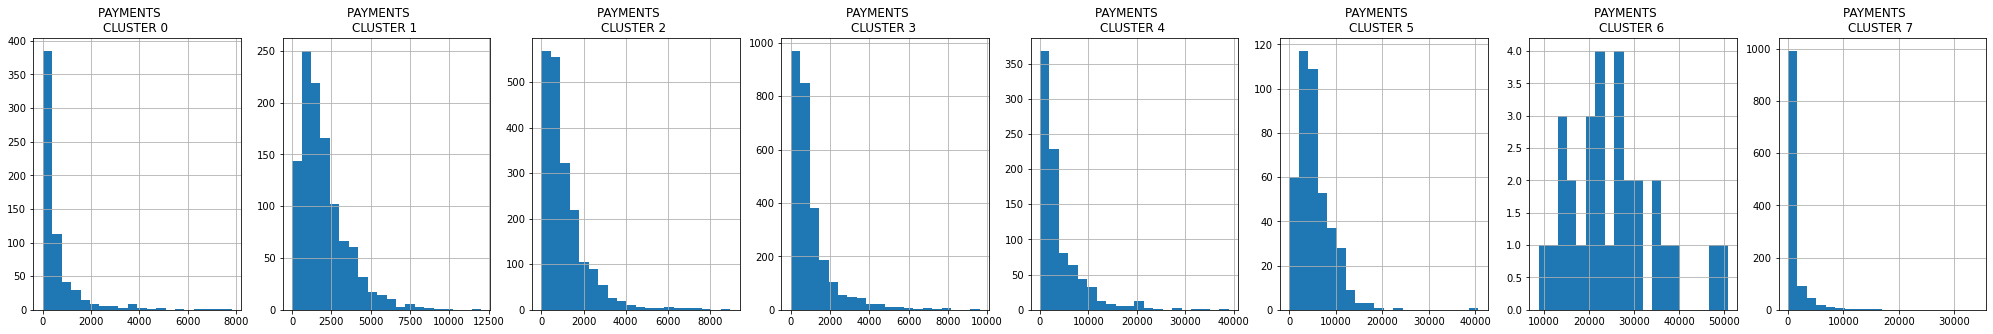

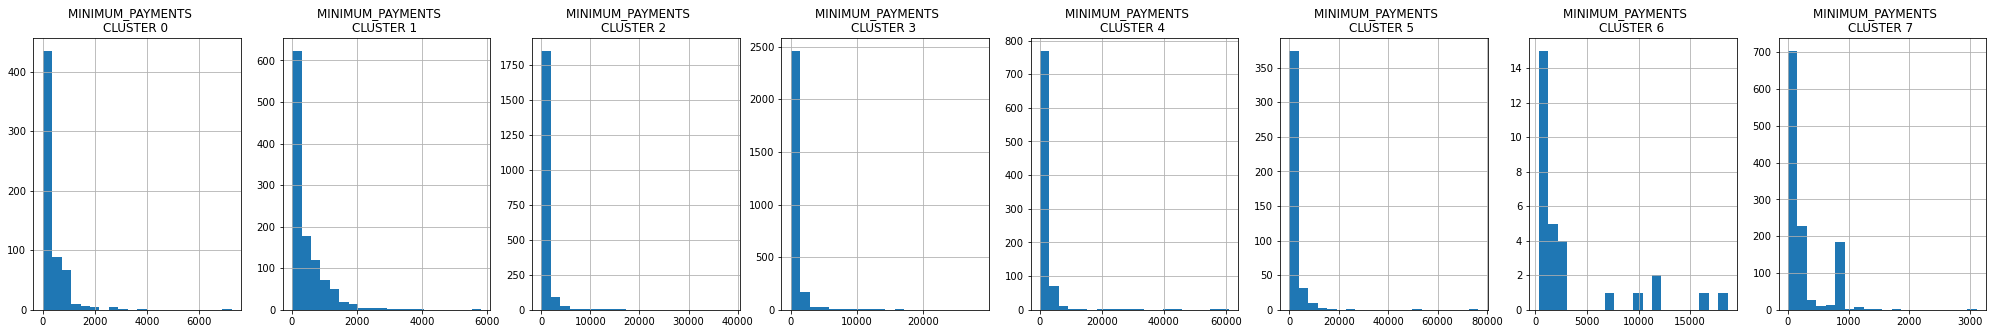

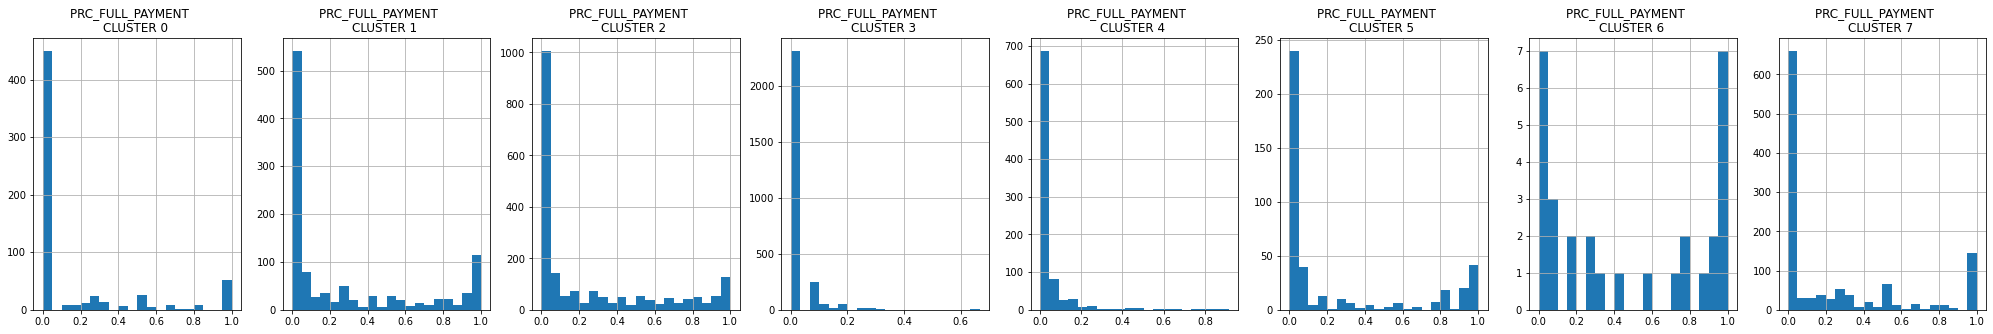

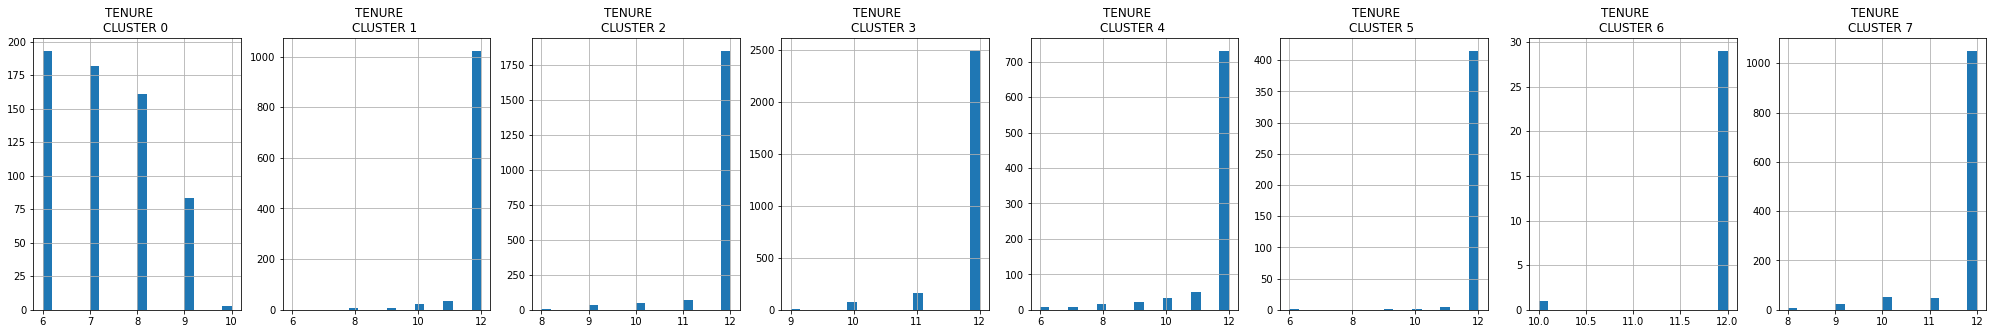

In [23]:
# Plot the histogram of various clusters
for i in dataframe.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = dataframe_cluster[dataframe_cluster['CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCLUSTER {} '.format(i,j))
  
  plt.show()

In [24]:
# Principal component analysis
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(datascaled)
principal_comp

array([[-1.68222057, -1.07645013],
       [-1.13829484,  2.50646904],
       [ 0.96968524, -0.3835216 ],
       ...,
       [-0.92620425, -1.81078106],
       [-2.33655229, -0.65796195],
       [-0.55642121, -0.40046933]])

In [25]:
#now creating new data frame for PCA components
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076450
1,-1.138295,2.506469
2,0.969685,-0.383522
3,-0.873628,0.043164
4,-1.599434,-0.688579


In [26]:
#concatenate the clusters to PCA dataframe
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076450,3
1,-1.138295,2.506469,4
2,0.969685,-0.383522,1
3,-0.873628,0.043164,3
4,-1.599434,-0.688579,3


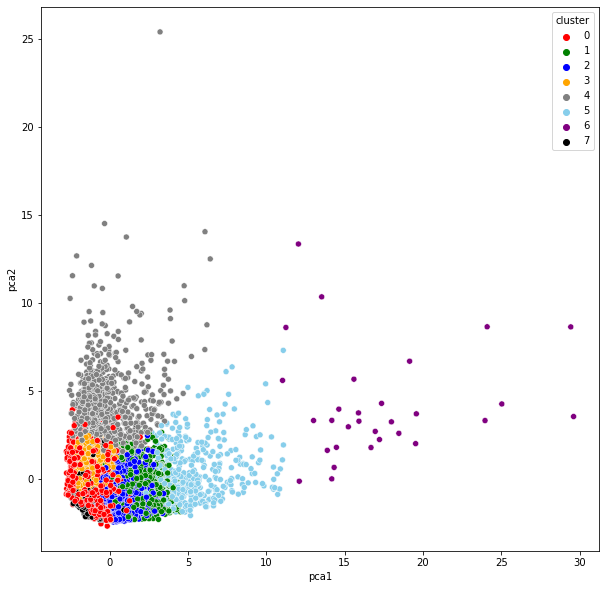

In [27]:
# visualizing clusters in 2 axis frame
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','orange','gray','skyblue','purple', 'black'])
plt.show()

# In This Way For Marketing purposes in the retail industry we build 8 groups of customers, so that company can target particular customers.